Number of Rows: 2111, Number of features in dataset: 17
No. of duplicates: 24
No. null values: 
 Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
Duplicate rows: 
     Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
98   Female  21.0    1.52    42.0                             no   no   3.0   
106  Female  25.0    1.57    55.0                             no  yes   2.0   
174    Male  21.0    1.6

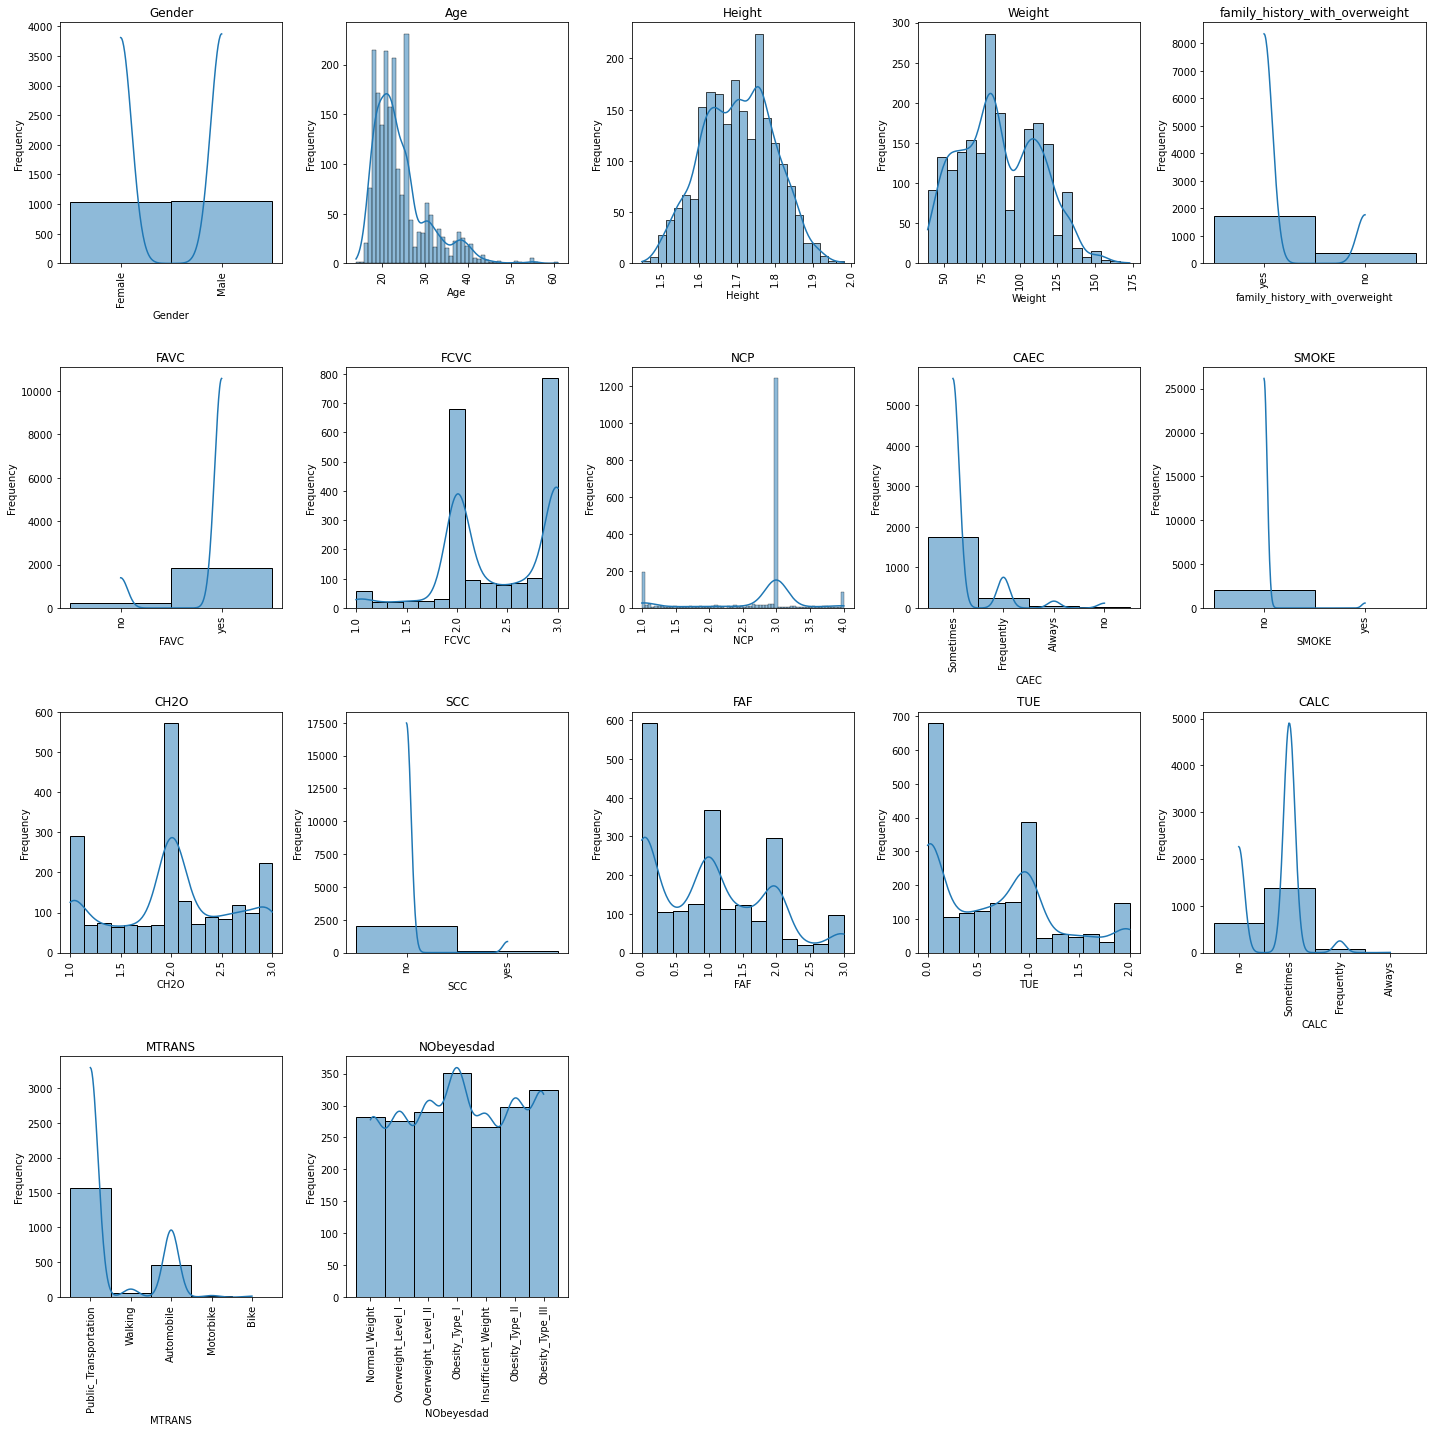

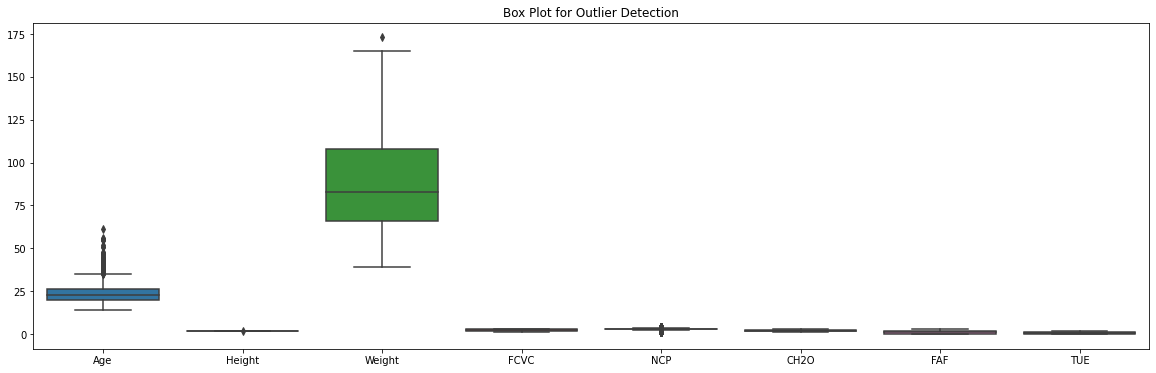

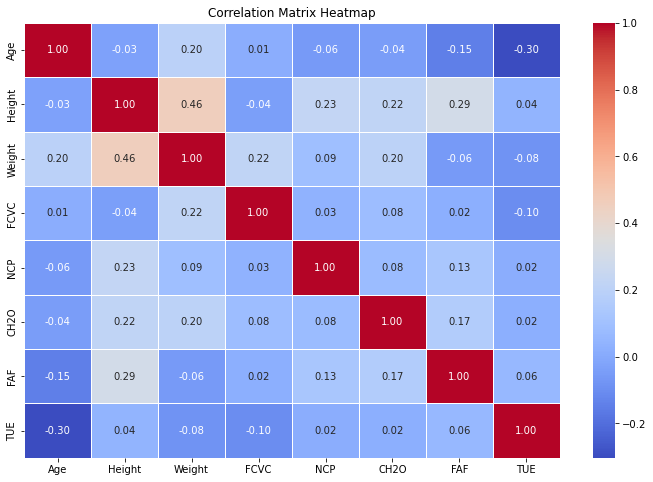

C:\Users\SHIREE~1\AppData\Local\Temp/ipykernel_7544/998443982.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le_bin.fit_transform(X[col])
c:\Users\Shireesha myadari\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Missing values per column:
 Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Gender_Male                       0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64
Data Types of Features after Encoding:
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                      

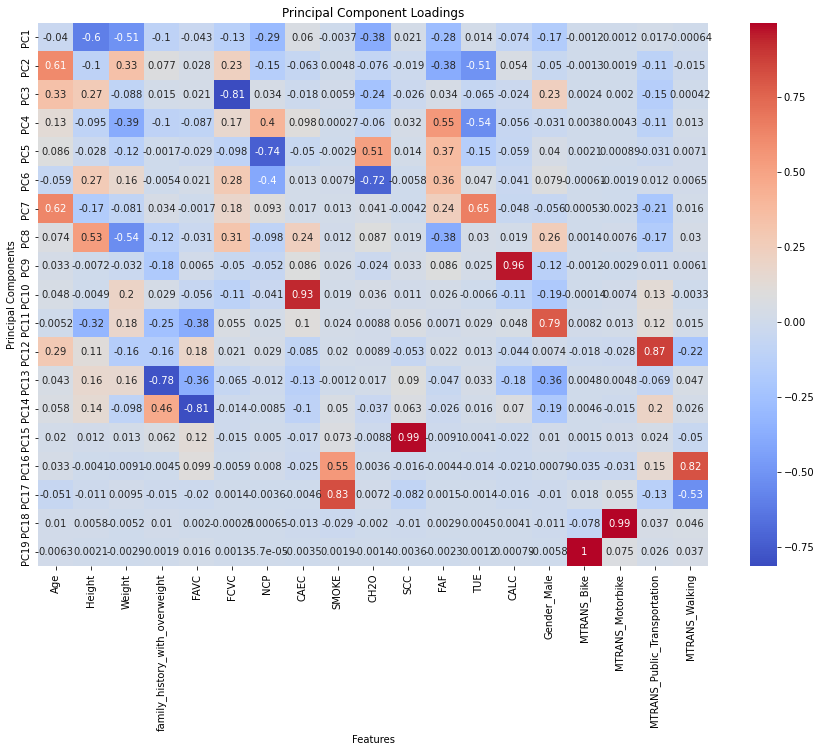

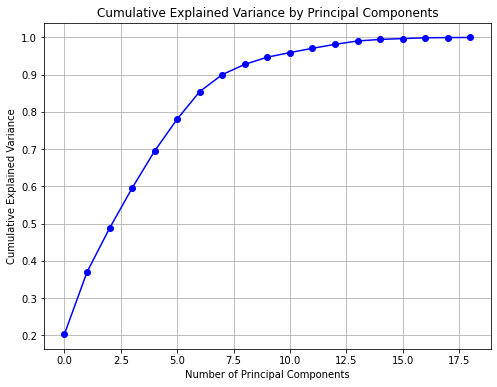

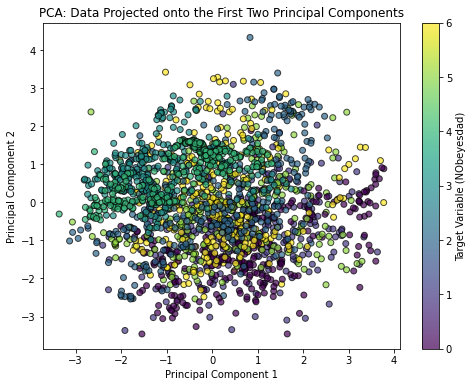

PC1: 0.2036 (20.36%)
PC2: 0.1664 (16.64%)
PC3: 0.1177 (11.77%)
PC4: 0.1077 (10.77%)
PC5: 0.0998 (9.98%)
PC6: 0.0856 (8.56%)
PC7: 0.0739 (7.39%)
PC8: 0.0455 (4.55%)
PC9: 0.0275 (2.75%)
PC10: 0.0193 (1.93%)
PC11: 0.0122 (1.22%)
PC12: 0.0116 (1.16%)
PC13: 0.0106 (1.06%)
PC14: 0.0091 (0.91%)
PC15: 0.0042 (0.42%)
PC16: 0.0022 (0.22%)
PC17: 0.0021 (0.21%)
PC18: 0.0005 (0.05%)
PC19: 0.0003 (0.03%)


In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


# Fetch dataset
dataset = fetch_ucirepo(id=544)

# Extract features and target
features = pd.DataFrame(dataset.data.features)
target = pd.DataFrame(dataset.data.targets)

df = pd.concat([features, target], axis=1)

print(f"Number of Rows: {df.shape[0]}, Number of features in dataset: {df.shape[1]}")
print(f"No. of duplicates: {df.duplicated().sum()}")
print(f"No. null values: \n {df.isnull().sum()}")

duplicates = df[df.duplicated()]
print(f"Duplicate rows: \n{duplicates}")


# Drop duplicates
data_new = df.drop_duplicates().reset_index(drop=True)

# Extract features and target
X = data_new[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
              'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = data_new['NObeyesdad']

print(f"Current shape of dataframe: {data_new.shape}")
print(f"Current shape of features: {X.shape}")
print(f"Current shape of target: {y.shape}")
print(f"No. nulls: {data_new.isnull().sum()}")
print(f"No. nulls: {X.isnull().sum()}")
print(f"No. nulls: {y.isnull().sum()}")
pd.concat([data_new.head(), data_new.tail()])

# -------------------- Data Distributions ------------------
def plot_distributions(X):
    # Select numerical columns
    numerical_columns = X.select_dtypes(include=['float64', 'int', 'object']).columns
    
    # Create a figure to hold all the plots
    num_plots = len(numerical_columns)
    num_cols = 5  # Set number of columns to arrange plots in
    num_rows = (num_plots // num_cols) + 1  # Adjust number of rows based on the number of plots

    plt.figure(figsize=(20, num_rows * 5))  # Set the figure size dynamically based on the number of rows

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)  # Adjust grid size based on number of rows and columns
        sns.histplot(X[column], kde=True)
        plt.title(f'{column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)

    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Passing your DataFrame to the function
plot_distributions(data_new)


# -------------------- Outliers ----------------------
plt.figure(figsize=(20, 6))
sns.boxplot(data=data_new, orient='V')
plt.title("Box Plot for Outlier Detection")
plt.show()


# ------------------ Correlation Matrix -----------------
corr_matrix = data_new.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()




# ----------- Encoding -----------------------

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)  # Now y is an encoded NumPy array

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode binary categorical columns using LabelEncoder
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
le_bin = LabelEncoder()
for col in binary_cols:
    if col in categorical_cols:
        X[col] = le_bin.fit_transform(X[col])

# Encode ordinal categorical columns using OrdinalEncoder
ordinal_cols = ['CAEC', 'CALC']
ordinal_mapping = [['no', 'Sometimes', 'Frequently', 'Always']]
ordinal_encoder = OrdinalEncoder(categories=ordinal_mapping * len(ordinal_cols))  # Fix shape mismatch
X[ordinal_cols] = ordinal_encoder.fit_transform(X[ordinal_cols])

# Encode nominal categorical columns using OneHotEncoder
#sparse=False use for windows; MAC use sparse_output=False
# sparse_output=False typically drop one column manually to prevent the dummy variable trap.
#sparse=True ;  the sparse matrix is generated, and there isn't an explicit need to manually drop a column

onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')   
encoded_array = onehot_encoder.fit_transform(X[['Gender', 'MTRANS']])
encoded_X = pd.DataFrame(encoded_array, columns=onehot_encoder.get_feature_names_out(['Gender', 'MTRANS']), index=X.index)

# Merge encoded features back and drop original categorical columns
X = pd.concat([X, encoded_X], axis=1)
X.drop(columns=['Gender', 'MTRANS'], inplace=True)

# Handle missing values (if any)
#X.fillna(0, inplace=True)

# Ensure no NaNs
print("Missing values per column:\n", X.isna().sum())

# ----------- Check Data Types ---------
print("Data Types of Features after Encoding:")
print(X.dtypes)

# ----------- Scaling -----------------------
# StandardScaler should be applied only on numerical columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# ----------- PCA ---------------------------
# PCA should also be applied only on numerical columns
pca = PCA(n_components=19)
principal_components = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_

# 1. PCA Component Loadings
plt.figure(figsize=(15, 10))
sns.heatmap(pca.components_, annot=True, cmap='coolwarm', xticklabels=X.columns, yticklabels=[f'PC{i+1}' for i in range(len(explained_variance))])
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.title("Principal Component Loadings")
plt.show()

# 2. Explained Variance Plot
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='-', color='b')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# 3. Scatter Plot of First Two Principal Components
X_pca_2d = principal_components[:, :2]

plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label='Target Variable (NObeyesdad)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Data Projected onto the First Two Principal Components')
plt.show()

# Display Explained Variance
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f} ({var * 100:.2f}%)")


# ------------------ PCA ---------------------------

# Create PCA components DataFrame for consistency with the target variable
principal_components_df = pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(principal_components.shape[1])])

# Add the target variable to the PCA DataFrame for coloring
principal_components_df['NObeyesdad'] = y

# Create labels for the scatter matrix plot
labels = {
    str(i): f"PC {i+1} ({var * 100:.1f}%)"
    for i, var in enumerate(explained_variance)
}

# Scatterplot for the first 3 PCA components
fig = px.scatter_matrix(
    principal_components_df,
    labels=labels,
    dimensions=['PC1', 'PC2', 'PC3'],  # Explicitly use the column names here
    color='NObeyesdad',  # Use the encoded target variable for coloring
    color_discrete_sequence=px.colors.sequential.Turbo  # Set the color sequence
)

# Hide the diagonal plots (optional)
fig.update_traces(diagonal_visible=False)

# Update layout for readability
fig.update_layout(
    title=dict(text='PCA Components - First 3 Components'),
    title_font_size=30,
    width=1000,
    height=800,
)

# Show the figure
fig.show()

# Scatterplot for the first 5 PCA components
fig = px.scatter_matrix(
    principal_components_df,
    labels=labels,
    dimensions=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],  # Explicitly use the column names here
    color='NObeyesdad',  # Use the encoded target variable for coloring
    color_discrete_sequence=px.colors.sequential.Turbo  # Set the color sequence
)

# Hide the diagonal plots (optional)
fig.update_traces(diagonal_visible=False)

# Update layout for readability
fig.update_layout(
    title=dict(text='PCA Components - First 5 Components'),
    title_font_size=30,
    width=1000,
    height=800,
)

# Show the figure
fig.show()


In [5]:
import pandas as pd
url="https://github.com/Ssejdenfaden/ML2025Report/blob/main/raw_data.csv"
df_read=pd.read_csv(url)
df_read.head()

HTTPError: HTTP Error 404: Not Found

In [2]:
duplicates = df[df.duplicated()]
duplicates

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight
